In [0]:
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import validation_curve, learning_curve, train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [19]:
dataset = load_boston()
dataset
x_all, y_all = dataset.data, dataset.target

x_all.shape


(506, 13)

In [0]:
def func(x):
  global x_all, y_all
  y_pred = np.dot(x_all, x)
  l = np.average((y_pred - y_all) ** 2) / 2
  return l
  

In [0]:
def gradient(x):
  global x_all, y_all
  y_pred = np.dot(x_all, x)
  grad = np.dot(y_pred - y_all, x_all) / x_all.shape[0]
  return grad

In [0]:
def descend_one_iteration(x, learning_rate):
  grad = gradient(x)
  x_new = x - learning_rate * gradient(x)
  return x_new

In [0]:
def optimize(iterations, learning_rate):
  x0 = np.random.rand(x_all.shape[1])

  scores = []
  x = x0
  for i in range(iterations):
    x = descend_one_iteration(x, learning_rate)
    score = func(x)
    scores.append(score)
    
  return (x, scores)
  
  



In [0]:
learning_rate = 1e-8
x_opt, scores = optimize(1000, learning_rate)

(0, 10000)

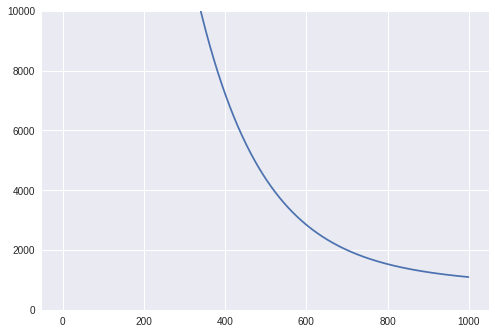

In [65]:
plt.plot(scores)
plt.ylim((0, 10000))

(0, 500)

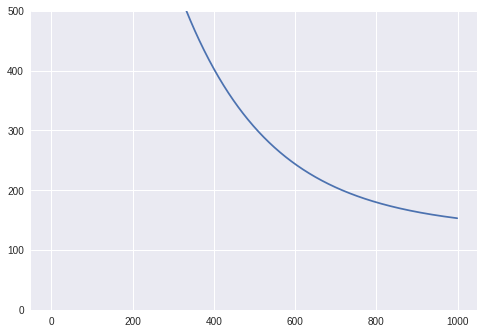

In [67]:
x_opt, scores = optimize(1000, 1e-7)  
plt.plot(scores)
plt.ylim((0, 500))

Function value:  120.10796251719904


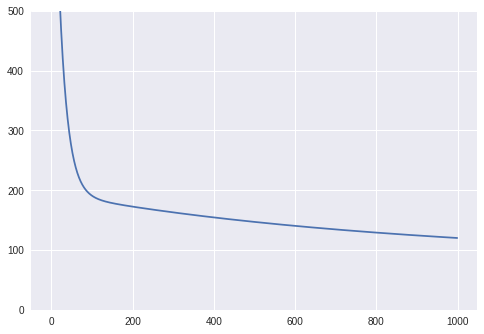

In [73]:
x_opt, scores = optimize(1000, 1e-6)  
plt.plot(scores)
plt.ylim((0, 500))
print("Function value: ", scores[-1])

/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:70: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in square
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in subtract
  This is separate from the ipykernel package so we can avoid doing imports until


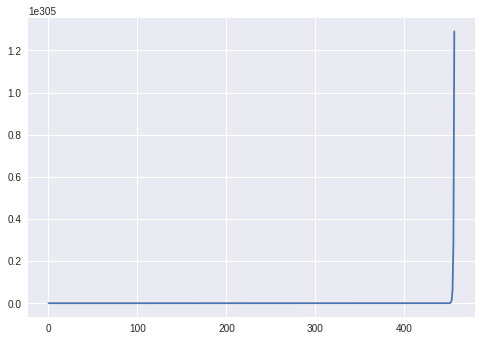

In [70]:
x_opt, scores = optimize(1000, 1e-5)  
plt.plot(scores)
# plt.ylim((0, 500))

Function value:  43.20038472539916


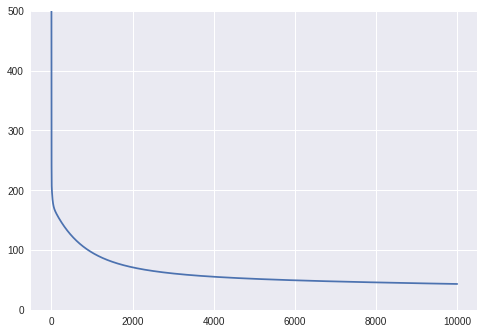

In [74]:
x_opt, scores = optimize(10000, 1e-6)  
plt.plot(scores)
plt.ylim((0, 500))
print("Function value: ", scores[-1])

In [0]:
def sgd_gradient(x, i):  
  global x_all, y_all
  
  row = i % x_all.shape[0]
  
  y_pred = np.dot(x_all[row:row+1], x)
  grad = np.dot((y_pred - y_all)[row:row+1], x_all[row:row+1]) 
  return grad


In [0]:
def sgd_iteration(x, learning_rate, i):
  grad = sgd_gradient(x, i)
  x_new = x - learning_rate * gradient(x)
  return x_new

In [0]:
def sgd_optimize(iterations, learning_rate):
  x0 = np.random.rand(x_all.shape[1])

  scores = []
  x = x0
  for i in range(iterations):
    x = sgd_iteration(x, learning_rate, i)
    score = func(x)
    scores.append(score)
    
  return (x, scores)

Function value:  41.37751303152832


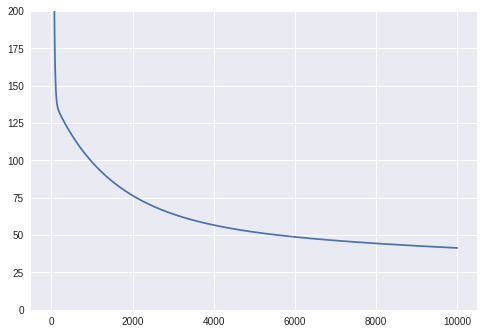

In [98]:
x_opt, scores = sgd_optimize(10000, 1e-6)  
plt.plot(scores)
plt.ylim((0, 200))
print("Function value: ", scores[-1])